In [1]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima_model import ARIMA
%matplotlib inline
import matplotlib.pyplot as plt
import warnings

Index(['dateTime', 'data'], dtype='object')

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


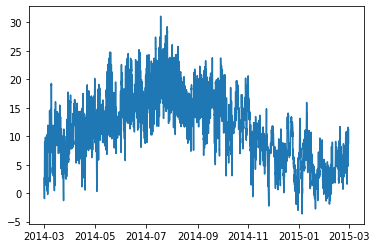

In [2]:
# import temperature time series
df = pd.read_csv('out_temp.csv', usecols=['dateTime', 'data'])
display(df.columns)
# convert to datetime object
df['dateTime'] = pd.to_datetime(df['dateTime'])
# # convert to pandas time series
ts = df.set_index('dateTime')
# plot results
plt.plot(ts)



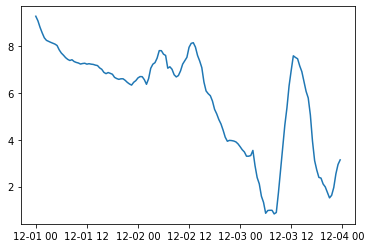

In [3]:
t_out = ts.loc['2014-12-01':'2014-12-03']
plt.plot(t_out)

[1200, 2200, 3200, 4200, 5200, 6200, 7200, 8200, 9200]

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

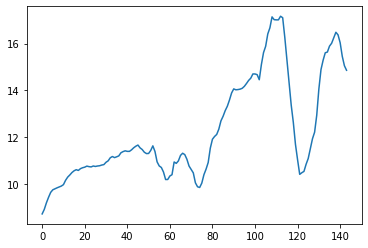

In [4]:
c = list(range(1200, 10000, 1000))
display(c)
k = np.array(list(range(1, 10, 1))) * 0.1
display(k)
t_comf = 18
t_star = t_comf - np.array(t_out['data'])
plt.plot(t_star)

In [7]:
def calc_q(c, k, t, t_out):
    q = []
    for i in range(1, len(t_out) - 1):
        tmp = t[i - 1] * (c + k) + c*(t_out[i] - t_out[i - 1]) - c*t[i - 1]
        q.append(tmp)
    return q


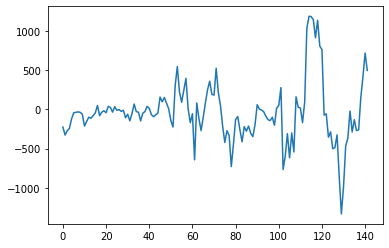

In [10]:
result = calc_q(c=1200, k=1, t=t_star, t_out=t_out['data'])
plt.plot(result)